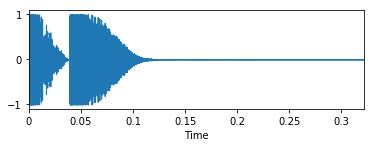

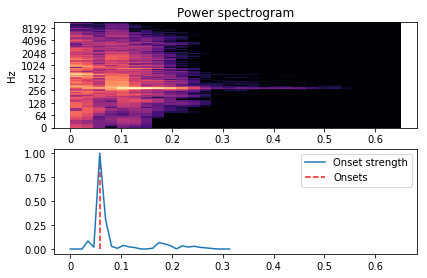

In [1]:
%matplotlib inline
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('snare.wav', sr=None)
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)

onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = librosa.stft(y)
plt.figure()

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [2]:
%matplotlib inline
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from scipy import *
from scipy.signal import *

y1, sr = librosa.load('clap.wav', sr=None)
m_hat1 = abs(hilbert(y1))

y2, sr = librosa.load('clap2.wav', sr=None)
m_hat2 = abs(hilbert(y2))

y3, sr = librosa.load('snare.wav', sr=None)
m_hat3 = abs(hilbert(y3))

print(np.corrcoef(y1,y1))


[[ 1.  1.]
 [ 1.  1.]]
